In [1]:
import mysql.connector
import pandas as pd
import matplotlib as plt

# Set pandas display options to show more rows and columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [2]:
# Connect to the MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="123456",
    database="cricket_data"
)

# Define the query to select all columns from the matches table
query = "SELECT * FROM matches;"

# Execute the query and fetch the results
cursor = connection.cursor()
cursor.execute(query)
matches_data = cursor.fetchall()

# Close the cursor and connection
cursor.close()
connection.close()

# Convert the fetched data to a pandas DataFrame
matches_df = pd.DataFrame(matches_data, columns=[desc[0] for desc in cursor.description])

In [3]:
matches_df.head(10)

,start_date,teams_type,match_type,gender,match_id,team_involved_one,team_involved_two
0,2016-11-03,international,Test,male,1000851,Australia,South Africa
1,2016-11-12,international,Test,male,1000853,Australia,South Africa
2,2016-11-24,international,Test,male,1000855,Australia,South Africa
3,2016-12-15,international,Test,male,1000881,Australia,Pakistan
4,2016-12-26,international,Test,male,1000883,Australia,Pakistan
5,2017-01-03,international,Test,male,1000885,Australia,Pakistan
6,2017-01-13,international,ODI,male,1000887,Australia,Pakistan
7,2017-01-15,international,ODI,male,1000889,Australia,Pakistan
8,2017-01-19,international,ODI,male,1000891,Australia,Pakistan
9,2017-01-22,international,ODI,male,1000893,Australia,Pakistan


In [4]:
matches_df.describe()

,start_date,teams_type,match_type,gender,match_id,team_involved_one,team_involved_two
count,17188,17188,17188,17188,17188,17188,17188
unique,5200,2,39,2,17188,346,347
top,2019-02-24,club,T20,male,1000851,England,Pakistan
freq,25,9119,3560,14255,1,634,635


In [5]:
# Convert the date column to datetime format
matches_df['start_date'] = pd.to_datetime(matches_df['start_date'])

# Find the oldest and newest dates
oldest_date = matches_df['start_date'].min()
newest_date = matches_df['start_date'].max()

# Filter the DataFrame for the oldest and newest dates
oldest_match = matches_df[matches_df['start_date'] == oldest_date]
newest_match = matches_df[matches_df['start_date'] == newest_date]

# Print oldest match information
print("Oldest Match:")
print(oldest_match.to_string(index=False))

# Print newest match information
print("\nNewest Match:")
print(newest_match.to_string(index=False))

Oldest Match:
start_date    teams_type match_type gender match_id team_involved_one team_involved_two
2002-12-26 international       Test   male    64012         Australia           England
2002-12-26 international       Test   male    64022      South Africa          Pakistan

Newest Match:
start_date    teams_type match_type gender match_id team_involved_one team_involved_two
2024-06-20 international        T20   male  1415743             India       Afghanistan


In [6]:
# Group the data by year and match type, and count the number of matches in each group
matches_per_year = matches_df.groupby([matches_df['start_date'].dt.year]).size()

# Print the count per year for each match type
print(matches_per_year)

start_date
2002       3
2003     140
2004      96
2005      91
2006     168
2007     222
2008     221
2009     272
2010     295
2011     292
2012     428
2013     523
2014     867
2015     907
2016    1060
2017    1103
2018    1362
2019    1685
2020     731
2021    1630
2022    2022
2023    2024
2024    1046
dtype: int64


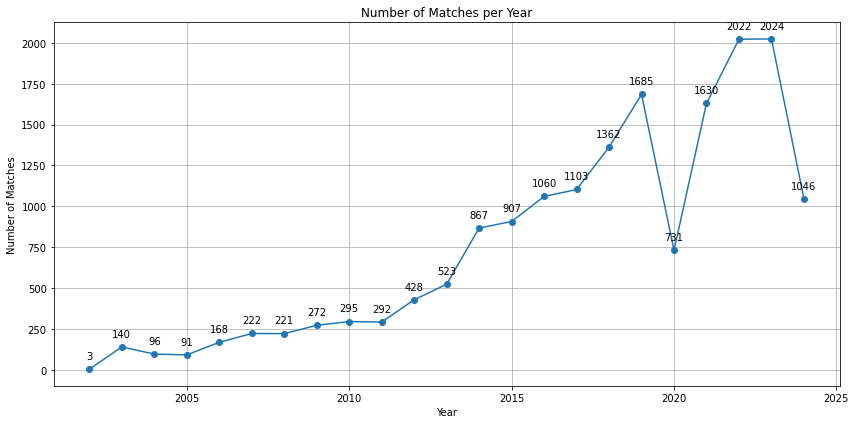

In [7]:
import matplotlib.pyplot as plt

# Plot the data on a line chart
plt.figure(figsize=(12, 6))
matches_per_year.plot(marker='o', linestyle='-')
plt.title('Number of Matches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')

# Annotate each data point with its value
for year, matches in matches_per_year.items():
    plt.annotate(matches, (year, matches), textcoords="offset points", xytext=(0, 10), ha='center')

plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
def matches_per_team(teams_type):
    # Filter matches based on the provided team type
    filtered_matches = matches_df[matches_df['teams_type'] == teams_type]
    
    # Create a list of all teams involved in the filtered matches
    all_teams = pd.concat([filtered_matches['team_involved_one'], filtered_matches['team_involved_two']]).unique()
    
    # Initialize a dictionary to store the count of matches per team
    matches_per_team = {team: 0 for team in all_teams}
    
    # Update the matches count for each team
    for team in all_teams:
        matches_per_team[team] = ((filtered_matches['team_involved_one'] == team) | (filtered_matches['team_involved_two'] == team)).sum()
    
    # Sort the dictionary items by value in descending order
    matches_per_team_sorted = dict(sorted(matches_per_team.items(), key=lambda item: item[1], reverse=True))
    
    return matches_per_team_sorted

international_match_per_team = matches_per_team("international")
print(international_match_per_team)

{'India': 1160, 'England': 1122, 'Australia': 1102, 'Sri Lanka': 1010, 'Pakistan': 1008, 'South Africa': 974, 'New Zealand': 932, 'West Indies': 909, 'Bangladesh': 747, 'Zimbabwe': 572, 'Ireland': 482, 'United Arab Emirates': 314, 'Afghanistan': 297, 'Netherlands': 292, 'Scotland': 274, 'Nepal': 272, 'Namibia': 245, 'Kenya': 214, 'Hong Kong': 196, 'Malaysia': 193, 'Uganda': 191, 'Papua New Guinea': 188, 'Oman': 186, 'Canada': 161, 'United States of America': 160, 'Thailand': 138, 'Singapore': 120, 'Tanzania': 107, 'Rwanda': 101, 'Kuwait': 92, 'Nigeria': 90, 'Jersey': 84, 'Denmark': 82, 'Germany': 81, 'Vanuatu': 81, 'Qatar': 79, 'Botswana': 79, 'Italy': 77, 'Bahrain': 76, 'Bermuda': 75, 'Japan': 74, 'Indonesia': 53, 'Malta': 50, 'China': 49, 'Saudi Arabia': 49, 'Sierra Leone': 48, 'France': 48, 'Gibraltar': 47, 'Bhutan': 47, 'Ghana': 46, 'Maldives': 46, 'Romania': 43, 'Guernsey': 36, 'Mozambique': 35, 'Austria': 34, 'Spain': 34, 'Luxembourg': 33, 'Norway': 32, 'Bulgaria': 32, 'Isle of M

In [9]:
club_match_per_team = matches_per_team("club")
print(club_match_per_team)

{'Hampshire': 359, 'Nottinghamshire': 358, 'Somerset': 354, 'Essex': 352, 'Surrey': 351, 'Worcestershire': 350, 'Kent': 350, 'Lancashire': 349, 'Durham': 347, 'Gloucestershire': 345, 'Yorkshire': 344, 'Middlesex': 344, 'Northamptonshire': 342, 'Sussex': 342, 'Leicestershire': 340, 'Glamorgan': 336, 'Derbyshire': 335, 'Mumbai Indians': 280, 'Warwickshire': 273, 'Perth Scorchers': 265, 'Sydney Sixers': 261, 'Adelaide Strikers': 258, 'Brisbane Heat': 258, 'Royal Challengers Bangalore': 258, 'Melbourne Stars': 254, 'Kolkata Knight Riders': 251, 'Melbourne Renegades': 243, 'Hobart Hurricanes': 242, 'Sydney Thunder': 241, 'Chennai Super Kings': 238, 'Rajasthan Royals': 221, 'Canterbury': 203, 'Northern Districts': 199, 'Kings XI Punjab': 190, 'Sunrisers Hyderabad': 182, 'Delhi Daredevils': 161, 'Guyana Amazon Warriors': 127, 'Jamaica Tallawahs': 117, 'Otago': 117, 'Wellington': 115, 'Central Districts': 114, 'Auckland': 113, 'Southern Vipers': 109, 'Delhi Capitals': 109, 'Peshawar Zalmi': 10